# Alternate Function

In [1]:
import ROOT as r

# To surpress unwanted messages
msgservice = r.RooMsgService.instance()
msgservice.setGlobalKillBelow(r.RooFit.FATAL)

import CMS_lumi, tdrstyle

tdrstyle.setTDRStyle()

Welcome to JupyROOT 6.08/05


<ROOT.TStyle object ("tdrStyle") at 0x54e3ff0>

In [2]:
#fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_AlphaRatioBkgEst_2018_03_27_02h28/HaddedFiles/Hadds_for_BkgEstimation/WWTree_WJets.root")

fin = r.TFile.Open("root://cmseos.fnal.gov//store/user/rasharma/SecondStep/WWTree_CommonNtuple_For1and2Lepton_2018_05_15_04h15/HaddedFiles/Hadds_for_BkgEstimation/WWTree_VJets.root")


treeIn = fin.Get("otree")

# Define the cuts
cutString_SideBand       =  "wSampleWeight*35867.06*btag0Wgt*totalEventWeight_2Lep*((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>40) && (PuppiAK8_jet_mass_so_corr<65)) || ((PuppiAK8_jet_mass_so_corr>110) && (PuppiAK8_jet_mass_so_corr<150)))) && (mass_llj_PuppiAK8>600))"

cutString_Signal         =  "wSampleWeight*35867.06*btag0Wgt*totalEventWeight_2Lep*((type==0||type==1) && (l_pt1>30 && (((type==0)&&(abs(l_eta1)<2.4)) || ((type==1)&&((abs(l_eta1)<2.5)&&!(abs(l_eta1)>1.4442 && abs(l_eta1)<1.566))))) && (l_pt2>30 && (((type==0)&&(abs(l_eta2)<2.4)) || ((type==1)&&((abs(l_eta2)<2.5)&&!(abs(l_eta2)>1.4442 && abs(l_eta2)<1.566))))) && ((ungroomed_PuppiAK8_jet_pt>200)&&(abs(ungroomed_PuppiAK8_jet_eta)<2.4)&&(PuppiAK8_jet_tau2tau1<0.55)) && (nBTagJet_loose==0) && (vbf_maxpt_jj_m>800) && (abs(vbf_maxpt_j2_eta-vbf_maxpt_j1_eta)>4.0) && ((vbf_maxpt_j1_pt>30) && (vbf_maxpt_j2_pt>30)) && ((((PuppiAK8_jet_mass_so_corr>65) && (PuppiAK8_jet_mass_so_corr<110)))) && (mass_llj_PuppiAK8>600))"

### Get V+jet histogram in signal, lower side-band and in whole side-band (low as well as high) region

In [3]:
hSignal_4bin = r.TH1D("hSignal_4bin","",4,600,2500)
hSignal_4bin.SetMarkerColor(1)
hSignal_4bin.SetLineColor(1)
hSignal_4bin.SetLineWidth(3)
hSignal_4bin.SetMarkerSize(1)

hSignal_15bin = r.TH1D("hSignal_15bin","",15,600,2500)
hSignal_15bin.SetMarkerColor(1)
hSignal_15bin.SetLineColor(1)
hSignal_15bin.SetLineWidth(3)
hSignal_15bin.SetMarkerSize(1)

hSignal_38bin = r.TH1D("hSignal_38bin","",38,600,2500)
hSignal_38bin.SetMarkerColor(1)
hSignal_38bin.SetLineColor(1)
hSignal_38bin.SetLineWidth(3)
hSignal_38bin.SetMarkerSize(1)

hSideBand_15bin = r.TH1D("hSideBand_15bin","",15,600,2500)
hSideBand_15bin.SetMarkerColor(2)
hSideBand_15bin.SetLineColor(2)
hSideBand_15bin.SetLineWidth(3)
hSideBand_15bin.SetMarkerSize(1)

hSideBand_38bin = r.TH1D("hSideBand_38bin","",38,600,2500)
hSideBand_38bin.SetMarkerColor(1)
hSideBand_38bin.SetLineColor(1)
hSideBand_38bin.SetLineWidth(3)
hSideBand_38bin.SetMarkerSize(1)

treeIn.Draw("mass_llj_PuppiAK8>>hSignal_4bin",cutString_Signal)
treeIn.Draw("mass_llj_PuppiAK8>>hSignal_15bin",cutString_Signal)
treeIn.Draw("mass_llj_PuppiAK8>>hSignal_38bin",cutString_Signal)

treeIn.Draw("mass_llj_PuppiAK8>>hSideBand_15bin",cutString_SideBand)
treeIn.Draw("mass_llj_PuppiAK8>>hSideBand_38bin",cutString_SideBand)

65L

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


### Plot the Zjet histogram in signal region, side-band region and lower side-band region

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


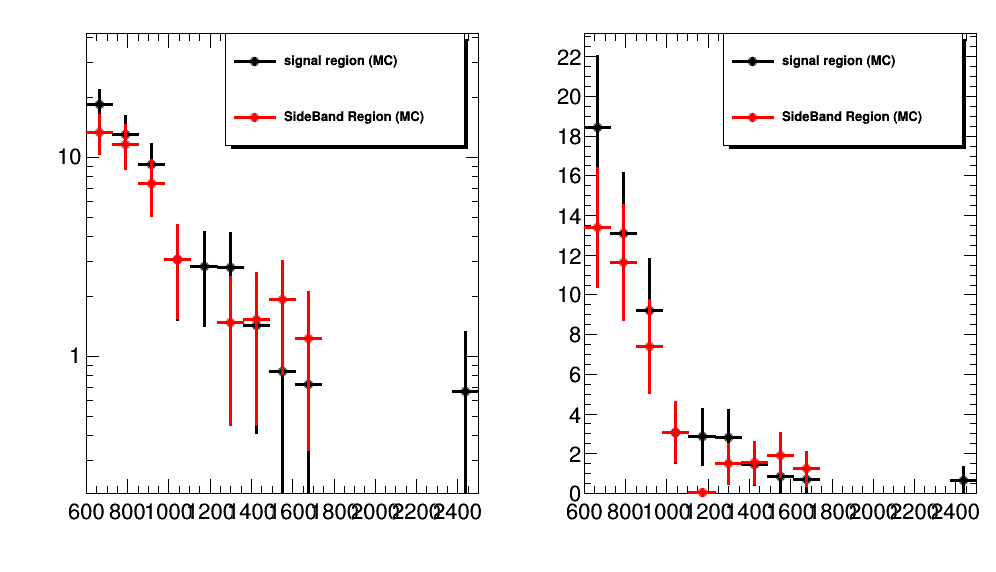

In [4]:
leg = r.TLegend(0.45,0.95,.95,0.75)

leg.AddEntry(hSignal_15bin,"signal region (MC)")
leg.AddEntry(hSideBand_15bin,"SideBand Region (MC)")


c1 = r.TCanvas("c1", "canvas", 1000, 600)
c1.SetLogy()
c1.Divide(2,1)
c1.cd(1)
r.gPad.SetLogy()
hSignal_15bin.SetTitle("Log axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()
c1.cd(2)
hSignal_15bin.SetTitle("Linear axis")
hSignal_15bin.Draw()
hSideBand_15bin.Draw("same")
leg.Draw()

c1.Draw()

# Part-I

## Calculate alpha 

> by dividing V+jets MC in signal and side-band region


> Also fit the alpha

Alpha does not exists

****************************************
Minimizer is Linear
Chi2                      =      1.54252
NDf                       =            7
p0                        =      1.88373   +/-   0.596458    
p1                        = -0.000822671   +/-   0.000552479 
Integral =  12357.8421781
Integral =  1156.31949181


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


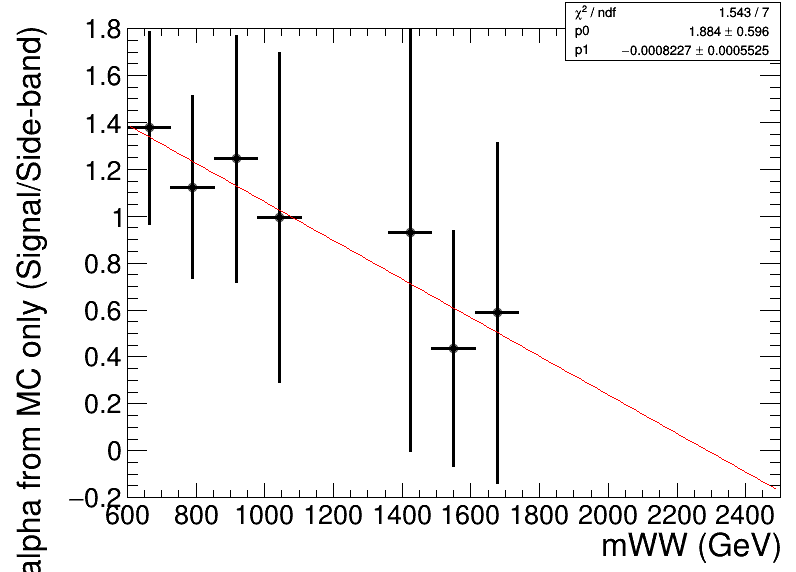

In [5]:
try: 
    Alpha.Delete();
except: 
    print "Alpha does not exists";
    
Alpha =  r.TH1D("Alpha","",15,600,2500)
Alpha = hSignal_15bin.Clone()
Alpha.Divide(hSideBand_15bin)
c1 = r.TCanvas("c1", "canvas", 800, 600)
Alpha.GetXaxis().SetTitle("mWW (GeV)")
Alpha.GetYaxis().SetTitle("alpha from MC only (Signal/Side-band)")
Alpha.SetMaximum(1.8)
Alpha.SetMinimum(-0.2)
Alpha.Draw()
f1 = r.TF1("f1","pol1",600,2500)
Alpha.Fit("f1")
c1.Draw()
print "Integral = ",Alpha.Integral("width")
print "Integral = ",f1.Integral(600,2500)
#for i in range(1,39):
#    print i,",",Alpha.GetBinContent(i),",",Alpha.GetBinLowEdge(i),",",Alpha.GetBinWidth(i)

Print alpha values in each bin: 


1 	600 650 => 625.0 1.36955983026
2 	650 700 => 675.0 1.32842628302
3 	700 750 => 725.0 1.28729273577
4 	750 800 => 775.0 1.24615918852
5 	800 850 => 825.0 1.20502564128
6 	850 900 => 875.0 1.16389209403
7 	900 950 => 925.0 1.12275854679
8 	950 1000 => 975.0 1.08162499954
9 	1000 1050 => 1025.0 1.0404914523
10 	1050 1100 => 1075.0 0.999357905049
11 	1100 1150 => 1125.0 0.958224357803
12 	1150 1200 => 1175.0 0.917090810557
13 	1200 1250 => 1225.0 0.875957263312
14 	1250 1300 => 1275.0 0.834823716066
15 	1300 1350 => 1325.0 0.79369016882
16 	1350 1400 => 1375.0 0.752556621574
17 	1400 1450 => 1425.0 0.711423074328
18 	1450 1500 => 1475.0 0.670289527082
19 	1500 1550 => 1525.0 0.629155979836
20 	1550 1600 => 1575.0 0.58802243259
21 	1600 1650 => 1625.0 0.546888885345
22 	1650 1700 => 1675.0 0.505755338099
23 	1700 1750 => 1725.0 0.464621790853
24 	1750 1800 => 1775.0 0.423488243607
25 	1800 1850 => 1825.0 0.382354696361
26 	1850 1900 => 1875.0 0.34122114

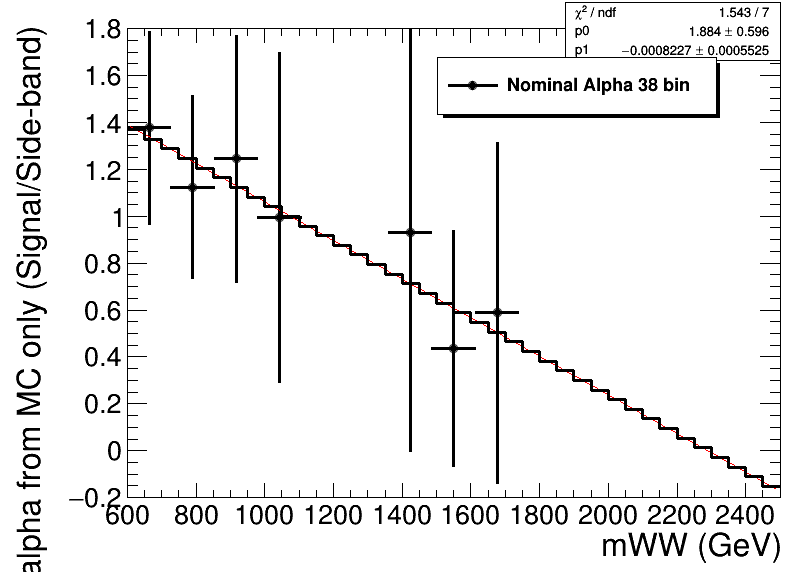

In [6]:
leg = r.TLegend(0.55,0.9,.9,0.8)

hAlpha_Fit_38bin = r.TH1F("hAlpha_Fit_38bin","",38,600,2500)
count = 1
import numpy as np
print "Print alpha values in each bin: \n\n"
for i in np.arange(600,2500,50):
    print count,"\t",i,i+50,"=>",(i+i+50)/2.,f1.Eval((i+i+50)/2.)
    hAlpha_Fit_38bin.SetBinContent(count,f1.Eval((i+i+50)/2.));
    count+=1

hAlpha_Fit_38bin.SetMarkerColor(1)
hAlpha_Fit_38bin.SetLineColor(1)
hAlpha_Fit_38bin.SetLineWidth(3)
hAlpha_Fit_38bin.SetMarkerSize(1)


leg.AddEntry(hAlpha_Fit_38bin,"Nominal Alpha 38 bin")
hAlpha_Fit_38bin.Draw("same")    
    
leg.Draw()

c1.Update()
c1.Draw()

# Get corrected V+jet in sideband region after fit to data

This histogram is saved in ExoVV fitter using create histogram method:

https://github.com/ram1123/EXOVVFitter/blob/master/g1_exo_doFit_class_new.py#L1795-L1796

But, this histogram was not taking the normalization so I have to scale it with the normalization. ***But, scaling the histogram also scaling the errors.***

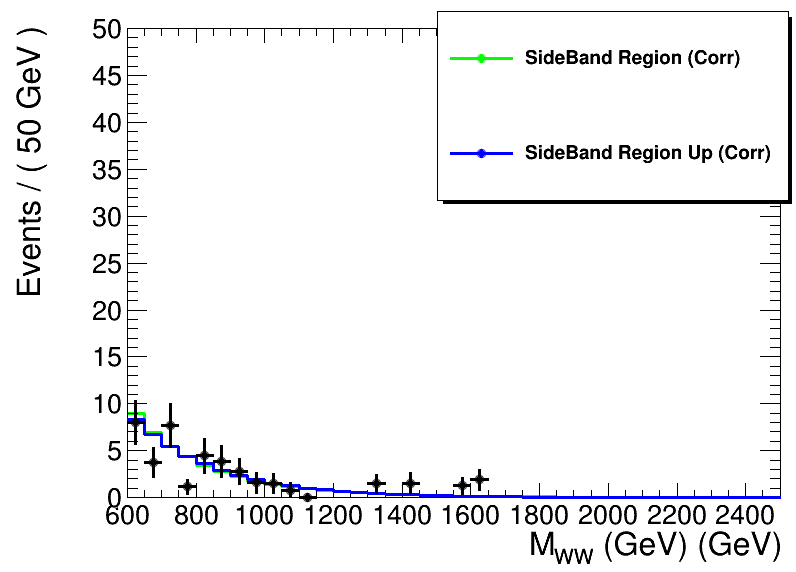

In [7]:
leg = r.TLegend(0.55,0.98,.99,0.65)

c1.Clear()
c1.SetLogy(0)
#Zjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_03_16_00h13_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
#Zjet_file = r.TFile.Open("WWTree_CleanedCode_Isolated_NaNFixed_Btag30GeV_2018_04_14_13h49_BothLSBUSB/wjetmodel_Ex__WJets0_xww__sb_lo_Exp_auto.root")
Zjet_file = r.TFile.Open("WWTree_CommonNtuple_For1and2Lepton_2018_05_15_04h15_ZV/wjetmodel_Ex__WJets0_xww__sb_lo_ExpTail_auto.root")

Zjet_file_Up0 = r.TFile.Open("WWTree_CommonNtuple_For1and2Lepton_2018_05_15_04h15_ZV/wjetmodel_Ex__WJets01_xww__sb_lo_Exp_auto.root")


Zjet_hist = Zjet_file.Get("rrv_mass_lvj__rrv_mass_lvj")
Zjet_hist.Scale(44.16)
Zjet_hist.SetMarkerColor(3)
Zjet_hist.SetLineColor(3)
Zjet_hist.SetLineWidth(3)
Zjet_hist.SetMarkerSize(1)
Zjet_hist.SetMaximum(50.0)
Zjet_hist.Draw("hist")

Zjet_hist_Up0 = Zjet_file_Up0.Get("rrv_mass_lvj__rrv_mass_lvj")
Zjet_hist_Up0.Scale(44.01)
Zjet_hist_Up0.SetMarkerColor(4)
Zjet_hist_Up0.SetLineColor(4)
Zjet_hist_Up0.SetLineWidth(3)
Zjet_hist_Up0.SetMarkerSize(1)
Zjet_hist_Up0.Draw("hist same")



hSideBand_38bin.Draw("same")

leg.AddEntry(Zjet_hist,"SideBand Region (Corr)")
leg.AddEntry(Zjet_hist_Up0,"SideBand Region Up (Corr)")

leg.Draw()
c1.Draw()

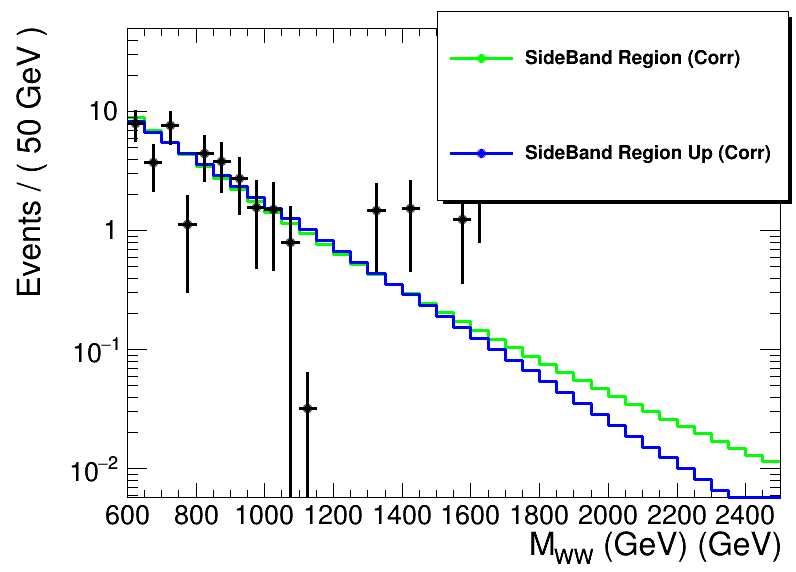

In [8]:
c1.SetLogy(1)
c1.Draw()

# Multiplication by Alpha to get Signal Region V+jets obtained from data.

Zjet yield =  52.5682729657
Bin 0 content =  12.2349243164
Bin 2 content =  9.28948879242
Bin 3 content =  7.08064889908
Bin 4 content =  5.41696214676
********************
MC bin contents: 

Bin 0 content =  43.7759166051
Bin 2 content =  7.08019119423
Bin 3 content =  1.56666949926
Bin 4 content =  0.6687165764


Info in <TH1F::SaveAs>: ROOT file ZjetFit_NominalShape_38bins.root has been created
Warning in <TFile::Append>: Replacing existing TH1: hModel_Sig (Potential memory leak).
Info in <TH1F::SaveAs>: ROOT file ZjetFit_AlternateShape_38bins_0.root has been created


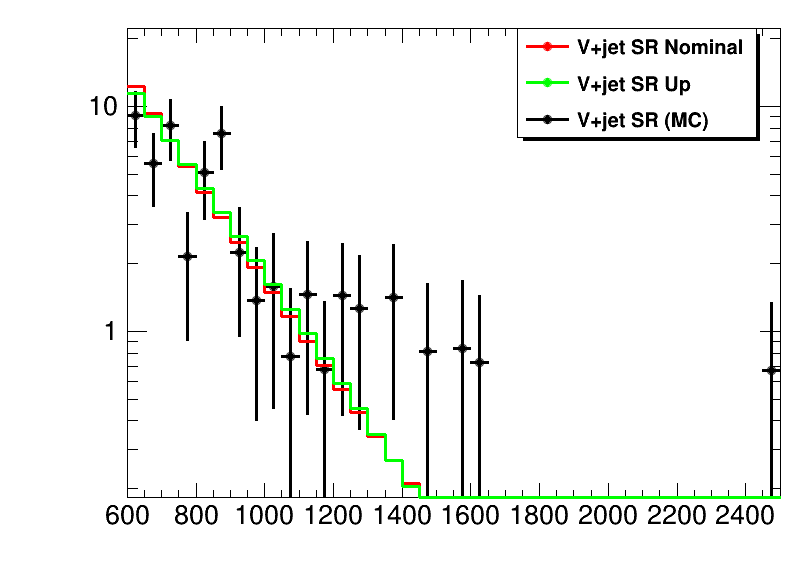

In [9]:
c1.Clear()
c1.SetLogy(0)
leg = r.TLegend(0.65,0.95,.95,0.76)


hModel_Sig = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig.Sumw2()
hModel_Sig.SetMarkerColor(2)
hModel_Sig.SetLineColor(2)
hModel_Sig.SetLineWidth(3)
hModel_Sig.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig.SetBinContent(i,Zjet_hist.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig,"V+jet SR Nominal")

hModel_Sig.SaveAs("ZjetFit_NominalShape_38bins.root")




hModel_Sig_up0 = r.TH1F("hModel_Sig","",38,600,2500)
hModel_Sig_up0.Sumw2()
hModel_Sig_up0.SetMarkerColor(3)
hModel_Sig_up0.SetLineColor(3)
hModel_Sig_up0.SetLineWidth(3)
hModel_Sig_up0.SetMarkerSize(1)

for i in range(1,39):
    hModel_Sig_up0.SetBinContent(i,Zjet_hist_Up0.GetBinContent(i)*hAlpha_Fit_38bin.GetBinContent(i))

leg.AddEntry(hModel_Sig_up0,"V+jet SR Up")

hModel_Sig_up0.SaveAs("ZjetFit_AlternateShape_38bins_0.root")


#hModel_Sig
hSignal_38bin.Draw()
hModel_Sig.Draw("same")
hModel_Sig_up0.Draw("same")

leg.AddEntry(hSignal_4bin,"V+jet SR (MC)")


leg.Draw()

print "Zjet yield = ", hModel_Sig.Integral()

print "Bin 0 content = ",hModel_Sig.GetBinContent(1)
print "Bin 2 content = ",hModel_Sig.GetBinContent(2)
print "Bin 3 content = ",hModel_Sig.GetBinContent(3)
print "Bin 4 content = ",hModel_Sig.GetBinContent(4)
print "*"*20
print "MC bin contents: \n"
print "Bin 0 content = ",hSignal_4bin.GetBinContent(1)
print "Bin 2 content = ",hSignal_4bin.GetBinContent(2)
print "Bin 3 content = ",hSignal_4bin.GetBinContent(3)
print "Bin 4 content = ",hSignal_4bin.GetBinContent(4)
c1.SetLogy(1)
c1.Draw()

Info in <TH1F::SaveAs>: ROOT file ZjetFit_NominalShape_4bins.root has been created
Info in <TH1F::SaveAs>: ROOT file ZjetFit_AlternateShape_4bins_Down.root has been created
Info in <TH1F::SaveAs>: ROOT file ZjetFit_AlternateShape_4bins_Up.root has been created


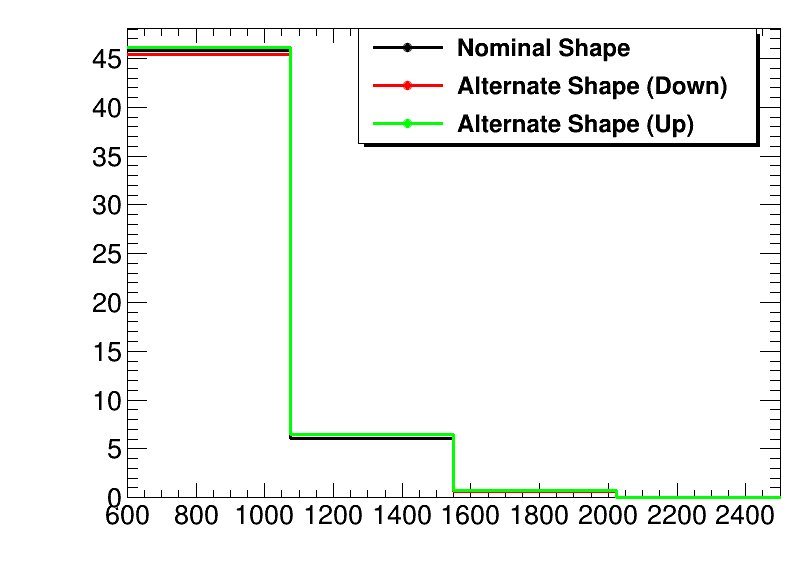

In [10]:
leg = r.TLegend(0.45,0.95,.95,0.75)

hModel_Sig_new = r.TH1F("hModel_Sig_new","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig.GetBinContent(i)
    bin[count] += hModel_Sig.GetBinContent(i)

hModel_Sig_new.SetBinContent(1,bin[1])
hModel_Sig_new.SetBinContent(2,bin[2])
hModel_Sig_new.SetBinContent(3,bin[3])
hModel_Sig_new.SetBinContent(4,bin[4])

hModel_Sig_new.SetMarkerColor(1)
hModel_Sig_new.SetLineColor(1)
hModel_Sig_new.SetLineWidth(3)
hModel_Sig_new.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_new,"Nominal Shape")
hModel_Sig_new.SaveAs("ZjetFit_NominalShape_4bins.root")

#########################################################
hModel_Sig_up_new0 = r.TH1F("hModel_Sig_up_new0","",4,600,2500)
count = 1
bin = [0]*5
for i in range(1,39):
    if i<36:
        if i%9==0:
            count+=1
    #print i,count,hModel_Sig_up.GetBinContent(i)
    bin[count] += hModel_Sig_up0.GetBinContent(i)

hModel_Sig_up_new0.SetBinContent(1,bin[1])
hModel_Sig_up_new0.SetBinContent(2,bin[2])
hModel_Sig_up_new0.SetBinContent(3,bin[3])
hModel_Sig_up_new0.SetBinContent(4,bin[4])

hModel_Sig_up_new0.SetMarkerColor(2)
hModel_Sig_up_new0.SetLineColor(2)
hModel_Sig_up_new0.SetLineWidth(3)
hModel_Sig_up_new0.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_up_new0,"Alternate Shape (Down)")

    
hModel_Sig_up_new0.SaveAs("ZjetFit_AlternateShape_4bins_Down.root")

#########################################################
hModel_Sig_up_new1 = r.TH1F("hModel_Sig_up_new1","",4,600,2500)

hModel_Sig_up_new1.SetBinContent(1,hModel_Sig_new.GetBinContent(1) + abs(hModel_Sig_up_new0.GetBinContent(1)-hModel_Sig_new.GetBinContent(1)))
hModel_Sig_up_new1.SetBinContent(2,hModel_Sig_new.GetBinContent(2) + abs(hModel_Sig_up_new0.GetBinContent(2)-hModel_Sig_new.GetBinContent(2)))
hModel_Sig_up_new1.SetBinContent(3,hModel_Sig_new.GetBinContent(3) + abs(hModel_Sig_up_new0.GetBinContent(3)-hModel_Sig_new.GetBinContent(3)))
hModel_Sig_up_new1.SetBinContent(4,hModel_Sig_new.GetBinContent(4) + abs(hModel_Sig_up_new0.GetBinContent(4)-hModel_Sig_new.GetBinContent(4)))

hModel_Sig_up_new1.SetMarkerColor(3)
hModel_Sig_up_new1.SetLineColor(3)
hModel_Sig_up_new1.SetLineWidth(3)
hModel_Sig_up_new1.SetMarkerSize(1)

leg.AddEntry(hModel_Sig_up_new1,"Alternate Shape (Up)")

    
hModel_Sig_up_new1.SaveAs("ZjetFit_AlternateShape_4bins_Up.root")


c1.Clear()
c1.SetLogy(0)
hModel_Sig_new.Draw()
hModel_Sig_up_new0.Draw("same")
hModel_Sig_up_new1.Draw("same")

leg.Draw()
c1.Draw()

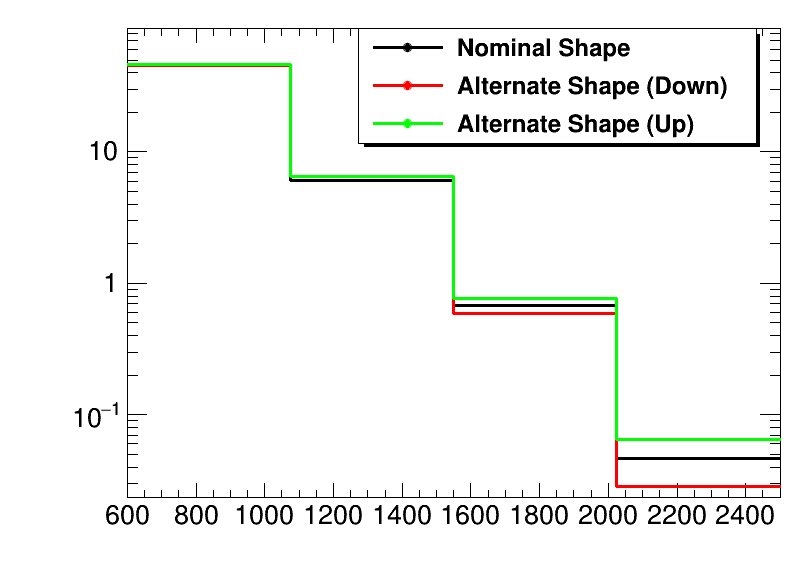

In [11]:
c1.SetLogy(1)
c1.Draw()

In [12]:
print "Program is done..."

Program is done...
